In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


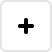
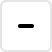
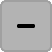
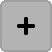
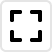
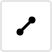
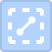
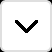
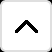
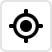
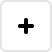
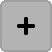
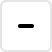
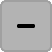
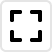
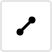
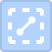
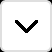
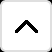
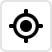

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data(f, n=8, t=None):
    ts = np.linspace(0, n, n + 1) if t is None else t
    xs = [f(elem) for elem in ts]
    ys = [0.0] * len(xs)
    return pd.DataFrame(dict(x=xs, y=ys))

In [4]:
def get_plot(title, df, breaks=None, labels=None, tooltips=None, trans=None):
    return ggplot(df, aes('x', 'y')) + \
        geom_point(tooltips=tooltips) + \
        scale_x_continuous(trans=trans, breaks=breaks, labels=labels) + \
        ggtitle(title)

In [5]:
get_plot("With log transformation", get_data(lambda x: 10**(-x)), trans='log10')

In [6]:
gggrid([
    get_plot(
        "Without transformation\ndegree = {0}".format(deg),
        get_data(lambda x: x * 10**deg, n=5)
    )
    for deg in [-8, -4, -2, -1, 0, 1, 2, 4, 8]
], ncol=3)

In [7]:
gggrid([
    get_plot(
        "Default",
        get_data(lambda x: x * 10**3, t=[0, 1, 2, 3, 4])
    ),
    get_plot(
        "Explicit format with e-notation",
        get_data(lambda x: x * 10**3, t=[0, 1, 2, 3, 4])
    ) + \
    scale_x_continuous(breaks=[1000, 3000], format='e'),
    get_plot(
        "Explicit power degree labels",
        get_data(lambda x: x * 10**3, t=[0, 1, 2, 3, 4])
    ) + \
    scale_x_continuous(breaks=[1000, 3000], labels=["\(10^3\)", "\(3 \cdot 10^3\)"]),
])

In [8]:
ggplot(get_data(lambda x: x * 10**(-8), t=[2, 3]), aes('x', 'y')) + \
    geom_point(tooltips=layer_tooltips().line("(^x, ^y)").line("x|^x").line("y|^y"))

In [9]:
data = {
    'name': ['a', 'b', 'c'],
    'value': [10**(-5), 3*10**(-5), 6*10**(-5)]
}

ggplot(data) + \
    geom_pie(aes(fill=as_discrete('name', order_by='..count..'), weight='value'), \
             size=15, hole=0.2, \
             labels=layer_labels().line('^slice'))